In [1]:
import numpy as np
# from tqdm.auto import tqdm
# from src.distance_measures import analyse_video, analyse_image
from src.gaussian_noise import generate_noise, generate_noise_array
from src.preprocessing import process_video
from src.gradient_descent import mean_size, find_params_from_image
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import label2rgb

In [2]:
size=300
threshold=0.3

In [3]:
# %%time
im = process_video('images/cheese_gel.avi', threshold=threshold, skip_size=239, size=size)[1]
a, t = find_params_from_image(im)
print('alpha: {:.2f}, tau: {:.2f}'.format(a, t))

136.11
67.43
33.92
36.07
alpha: 1.10, tau: 0.10


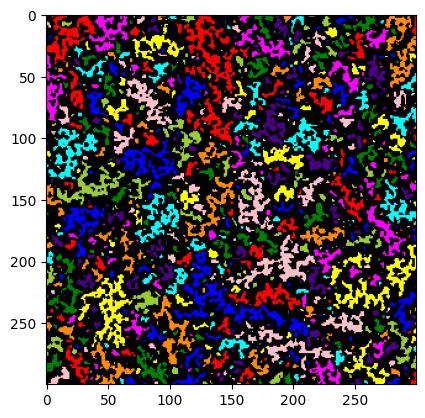

average size:  39.16789215686274


In [4]:
noise = generate_noise(size=size, threshold=t, smooth=a)
plt.imshow(label2rgb(noise))
plt.show()
print('average size: ', mean_size(noise))

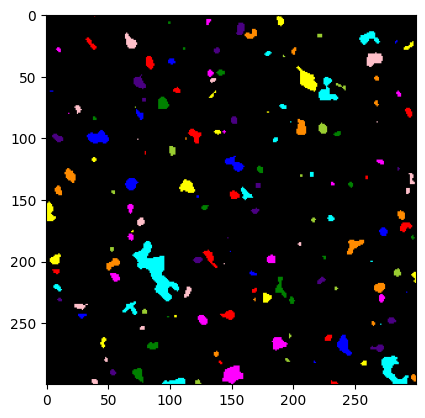

average size:  35.37888198757764


In [5]:
plt.imshow(label2rgb(im))
plt.show()
print('average size: ', mean_size(im))